In [1]:
import torch_geometric
from torch_geometric.data import Data
import torch
from itertools import product, permutations
from math import factorial
import networkx as nx
from covering import *
from scipy.linalg import eigh
import numpy as np

import plotly.graph_objects as go

In [2]:
dataset = torch.load("deg5_withcolouring.pt")

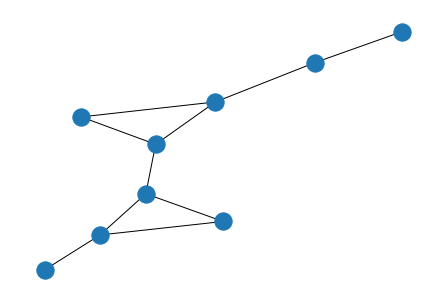

In [3]:
edge_index = torch.tensor([[0, 1], [1, 0],
                          [1, 2], [2, 1],
                          [2, 3], [3, 2],
                          [2, 4], [4, 2],
                          [3, 4], [4, 3],
                          [4, 5], [5, 4],
                          [5, 6], [6, 5],
                          [5, 8], [8, 5],
                          [6, 7], [7, 6],
                          [6, 8], [8, 6]],
                          # [8, 9], [9, 8],
                          # [9, 10], [10, 9],
                          # [10, 11], [11, 10]]
                           dtype=torch.long)

cycle_edge = [[2, 4], [5, 6]]

x = torch.tensor([[0], [0], [0], [0],
                  [0], [0], [0], [0],
                  [0]], dtype=torch.long)

data = Data(x=x, edge_index = edge_index.t().contiguous())



base = nx.Graph(edge_index.tolist())
nx.draw(base)

In [6]:
L = generate_with_cycle_data(data, k=2, cycle_edge=cycle_edge, stop=50)
print(len(L))
dataset = [l[0] for l in L]

total number of covers to check:  4
3


In [7]:
coord = {0: [-4., 0.],
            1: [-3., 0.],
            2: [-2., 0.],
            4: [-1., 0.],
            5: [0., 0.],
            6: [1., 0.],
            7: [2., 0.],
            3: [-1.5, np.sqrt(0.75)],
            8: [0.5, np.sqrt(0.75)]}
# xs = [coord[i][0] for i in range(9)]+[]
# ys = [coord[i][1] for i in range(9)]+[]
# zs = [0 for i in range(9)]
for i in range(9):
    base.nodes[i]['pos'] = (coord[i][0], coord[i][1], 0)

In [60]:
G = base


edge_x = []
edge_y = []
edge_z = []

# Get coordinates of edges
for edge in G.edges():
    x0, y0, z0 = G.nodes[edge[0]]['pos']
    x1, y1, z1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    edge_z.append(z0)
    edge_z.append(z1)
    edge_z.append(None)

# plot all edges
edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    line=dict(width=5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
node_z = []

# get node coordinates
for node in G.nodes():
    x, y, z = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)
    node_z.append(z)

# plot nodes
node_trace = go.Scatter3d(
    x=node_x, y=node_y, z=node_z,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=np.arange(0, 1, 1/len(G.nodes())),
        size=10,
        # colorbar=dict(
        #     thickness=15,
        #     title='Node Connections',
        #     xanchor='left',
        #     titleside='right'
        # ),
        line_width=2))

# plot figure
fig = go.Figure(data=[edge_trace, node_trace],
             # layout=go.Layout(
             #    title='<br>Network graph made with Python',
             #    titlefont_size=16,
             #    showlegend=False,
             #    hovermode='closest',
             #    margin=dict(b=20,l=5,r=5,t=40),
             #    # annotations=[ dict(
             #    #     text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
             #    #     showarrow=False,
             #    #     xref="paper", yref="paper",
             #    #     x=0.005, y=-0.002 ) ],
             #    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
             #    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

# plot figure
fig = go.Figure(data=[edge_trace, node_trace]
               )

# setting the right zoom and size
fig.update_layout(width=1400,
                  height=700,
                  scene = dict(aspectratio = dict(x=1, y=0.2, z=0.7 )),
                  showlegend=False
                 )
    
# Removing background etc 
fig.update_layout(scene = dict(
                xaxis = dict(
                     #backgroundcolor="rgb(0, 0, 0)",
                     #gridcolor="white",
                     showbackground=False,
                     showgrid=False,
                     #showticklabels=False,
                     visible=False,
                     #zerolinecolor="white",
                ),
                yaxis = dict(
                    #backgroundcolor="rgb(0, 0, 0)",
                    #gridcolor="white",
                    showbackground=False,
                    showgrid=False,
                    #showticklabels=False,
                    visible=False,
                    #zerolinecolor="white"
                ),
                zaxis = dict(
                    #backgroundcolor="rgb(0, 0, 0)",
                    #gridcolor="white",
                    showbackground=False,
                    showgrid=False,
                    #showticklabels=False,
                    visible=False,
                    #zerolinecolor="white",
                ),
                # width=700,
                # margin=dict(
                # r=10, l=10,
                # b=10, t=10)
                camera=dict(
                        up=dict(
                            x=0,
                            y=0,
                            z=1
                        ),
                        eye=dict(
                            x=0.1,
                            y=-1,
                            z=0.5,
                        )
                    ),
              ))

fig.write_image("images/base2.pdf")
#fig.show()

In [59]:
k=20
G = nx.Graph(dataset[k].edge_index.t().tolist())

In [33]:
# set base coordinates
eps=1+10**(-5)
coord = {0: [-4., 0.],
        1: [-3., 0.],
        2: [-2., 0.],
        4: [-1., 0.],
        5: [0., 0.],
        6: [1., 0.],
        7: [2., 0.],
        3: [-1.5, np.sqrt(0.75)],
        8: [0.5, np.sqrt(0.75)]}
for i in range(9):
    base.nodes[i]['pos'] = (coord[i][0], coord[i][1], 0.)

# set cover coordinates
size = len(G.nodes())
scale = 0.5
for i in range(size):
    #print(float(i//9), size/9)
    #print(i, float(i//9), size/(2*9), ((float(i//9)-size/(2*9))**2)/(size/(2*9))**2, base.nodes[i%9]['pos'][1] + (float(i//9)-size/(2*9))**2)
    G.nodes[i]['pos'] = (base.nodes[i%9]['pos'][0],
                         base.nodes[i%9]['pos'][1] - ((float(i//9)-np.round(size/(2*9)))**2)/(np.round(size/(2*9))*(size/(2*9)))**2, #+ np.log(float(i//9)+eps)-np.log(eps),
                         base.nodes[i%9]['pos'][2]+scale*float(i//9))

In [40]:
def cover_ploter(G):
    # set base coordinates
    eps=1+10**(-5)
    coord = {0: [-4., 0.],
            1: [-3., 0.],
            2: [-2., 0.],
            4: [-1., 0.],
            5: [0., 0.],
            6: [1., 0.],
            7: [2., 0.],
            3: [-1.5, np.sqrt(0.75)],
            8: [0.5, np.sqrt(0.75)]}
    for i in range(9):
        base.nodes[i]['pos'] = (coord[i][0], coord[i][1], 0.)

    # set cover coordinates
    size = len(G.nodes())
    scale = 0.5
    for i in range(size):
        #print(float(i//9), size/9)
        #print(i, float(i//9), size/(2*9), ((float(i//9)-size/(2*9))**2)/(size/(2*9))**2, base.nodes[i%9]['pos'][1] + (float(i//9)-size/(2*9))**2)
        G.nodes[i]['pos'] = (base.nodes[i%9]['pos'][0],
                             base.nodes[i%9]['pos'][1], # - ((float(i//9)-np.round(size/(2*9)))**2)/(np.round(size/(2*9))*(size/(2*9)))**2, #+ np.log(float(i//9)+eps)-np.log(eps),
                             base.nodes[i%9]['pos'][2]+scale*float(i//9))

    edge_x = []
    edge_y = []
    edge_z = []

    # Get coordinates of edges
    for edge in G.edges():
        x0, y0, z0 = G.nodes[edge[0]]['pos']
        x1, y1, z1 = G.nodes[edge[1]]['pos']
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)
        edge_z.append(z0)
        edge_z.append(z1)
        edge_z.append(None)

    # plot all edges
    edge_trace = go.Scatter3d(
        x=edge_x, y=edge_y, z=edge_z,
        line=dict(width=5, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_x = []
    node_y = []
    node_z = []

    # get node coordinates
    for node in G.nodes():
        x, y, z = G.nodes[node]['pos']
        node_x.append(x)
        node_y.append(y)
        node_z.append(z)

    # plot nodes
    node_trace = go.Scatter3d(
        x=node_x, y=node_y, z=node_z,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=False,
            # colorscale options
            #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
            #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
            #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
            colorscale='YlGnBu',
            reversescale=True,
            color=np.arange(0, 1, 1/len(G.nodes())),
            size=10,
            # colorbar=dict(
            #     thickness=15,
            #     title='Node Connections',
            #     xanchor='left',
            #     titleside='right'
            # ),
            line_width=2))

    # plot figure
    fig = go.Figure(data=[edge_trace, node_trace]
                   )
    
    # setting the right zoom and size
    fig.update_layout(width=1000,
                      height=700,
                      scene = dict(aspectratio = dict(x=1, y=0.2, z=0.7 )),
                      showlegend=False
                     )
    
    # Removing background etc 
    fig.update_layout(scene = dict(
                    xaxis = dict(
                         #backgroundcolor="rgb(0, 0, 0)",
                         #gridcolor="white",
                         showbackground=False,
                         showgrid=False,
                         #showticklabels=False,
                         visible=False,
                         #zerolinecolor="white",
                    ),
                    yaxis = dict(
                        #backgroundcolor="rgb(0, 0, 0)",
                        #gridcolor="white",
                        showbackground=False,
                        showgrid=False,
                        #showticklabels=False,
                        visible=False,
                        #zerolinecolor="white"
                    ),
                    zaxis = dict(
                        #backgroundcolor="rgb(0, 0, 0)",
                        #gridcolor="white",
                        showbackground=False,
                        showgrid=False,
                        #showticklabels=False,
                        visible=False,
                        #zerolinecolor="white",
                    ),
                    # width=700,
                    # margin=dict(
                    # r=10, l=10,
                    # b=10, t=10)
                    camera=dict(
                            up=dict(
                                x=0,
                                y=0,
                                z=1
                            ),
                            eye=dict(
                                x=0.1,
                                y=-1,
                                z=0.5,
                            )
                        ),
                  ))

    return fig
    #fig.show()
    
def all_cover_ploter(dataset, base):
    # set base coordinates
    eps=1+10**(-5)
    coord = {0: [-4., 0.],
            1: [-3., 0.],
            2: [-2., 0.],
            4: [-1., 0.],
            5: [0., 0.],
            6: [1., 0.],
            7: [2., 0.],
            3: [-1.5, np.sqrt(0.75)],
            8: [0.5, np.sqrt(0.75)]}
    for i in range(9):
        base.nodes[i]['pos'] = (coord[i][0], coord[i][1], 0.)
    
    # initialize nodes and edges
    node_x = []
    node_y = []
    node_z = []

    edge_x = []
    edge_y = []
    edge_z = []

    for p, l in enumerate(dataset):
        G = nx.Graph(l.edge_index.t().tolist())
        # set cover coordinates
        size = len(G.nodes())
        scale = 0.2
        for i in range(size):
            #print(float(i//9), size/9)
            #print(i, float(i//9), size/(2*9), ((float(i//9)-size/(2*9))**2)/(size/(2*9))**2, base.nodes[i%9]['pos'][1] + (float(i//9)-size/(2*9))**2)
            G.nodes[i]['pos'] = (base.nodes[i%9]['pos'][0] + 10*p,
                                 base.nodes[i%9]['pos'][1], # - ((float(i//9)-np.round(size/(2*9)))**2)/(np.round(size/(2*9))*(size/(2*9)))**2, #+ np.log(float(i//9)+eps)-np.log(eps),
                                 base.nodes[i%9]['pos'][2]+scale*float(i//9))

        # Get coordinates of edges
        for edge in G.edges():
            x0, y0, z0 = G.nodes[edge[0]]['pos']
            x1, y1, z1 = G.nodes[edge[1]]['pos']
            edge_x.append(x0)
            edge_x.append(x1)
            edge_x.append(None)
            edge_y.append(y0)
            edge_y.append(y1)
            edge_y.append(None)
            edge_z.append(z0)
            edge_z.append(z1)
            edge_z.append(None)

        # plot all edges
        edge_trace = go.Scatter3d(
            x=edge_x, y=edge_y, z=edge_z,
            line=dict(width=5, color='#888'),
            hoverinfo='none',
            mode='lines')

        # get node coordinates
        for node in G.nodes():
            x, y, z = G.nodes[node]['pos']
            node_x.append(x)
            node_y.append(y)
            node_z.append(z)

    # plot nodes
    node_trace = go.Scatter3d(
        x=node_x, y=node_y, z=node_z,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=False,
            # colorscale options
            #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
            #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
            #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
            colorscale='YlGnBu',
            reversescale=True,
            color=np.tile(np.arange(0, 1, 1/len(G.nodes())), len(dataset)),
            size=10,
            # colorbar=dict(
            #     thickness=15,
            #     title='Node Connections',
            #     xanchor='left',
            #     titleside='right'
            # ),
            line_width=2))

    # plot figure
    fig = go.Figure(data=[edge_trace, node_trace]
                   )
    
    # setting the right zoom and size
    fig.update_layout(width=1800,
                      height=1400,
                      scene = dict(aspectratio = dict(x=1, y=0.035, z=0.1 )),
                      showlegend=False
                     )
    
    # Removing background etc 
    fig.update_layout(scene = dict(
                    xaxis = dict(
                         #backgroundcolor="rgb(0, 0, 0)",
                         #gridcolor="white",
                         showbackground=False,
                         showgrid=False,
                         #showticklabels=False,
                         visible=False,
                         #zerolinecolor="white",
                    ),
                    yaxis = dict(
                        #backgroundcolor="rgb(0, 0, 0)",
                        #gridcolor="white",
                        showbackground=False,
                        showgrid=False,
                        #showticklabels=False,
                        visible=False,
                        #zerolinecolor="white"
                    ),
                    zaxis = dict(
                        #backgroundcolor="rgb(0, 0, 0)",
                        #gridcolor="white",
                        showbackground=False,
                        showgrid=False,
                        #showticklabels=False,
                        visible=False,
                        #zerolinecolor="white",
                    ),
                    # width=700,
                    # margin=dict(
                    # r=10, l=10,
                    # b=10, t=10)
                    camera=dict(
                            up=dict(
                                x=0,
                                y=0,
                                z=1
                            ),
                            eye=dict(
                                x=0.1,
                                y=-1,
                                z=0.5,
                            )
                        ),
                  ))
    
    fig.write_image("images/all_deg2.pdf")

    fig.show()

In [55]:
L = generate_with_cycle_data(data, k=4, cycle_edge=cycle_edge, stop=50)
print(len(L))
dataset = [l[0] for l in L]

total number of covers to check:  576
26


In [56]:
for i, l in enumerate(dataset):
    G = nx.Graph(l.edge_index.t().tolist())
    fig = cover_ploter(G)
    fig.write_image("images/deg4/deg4_covernb"+str(i)+".pdf")
    #fig.show()
    #break

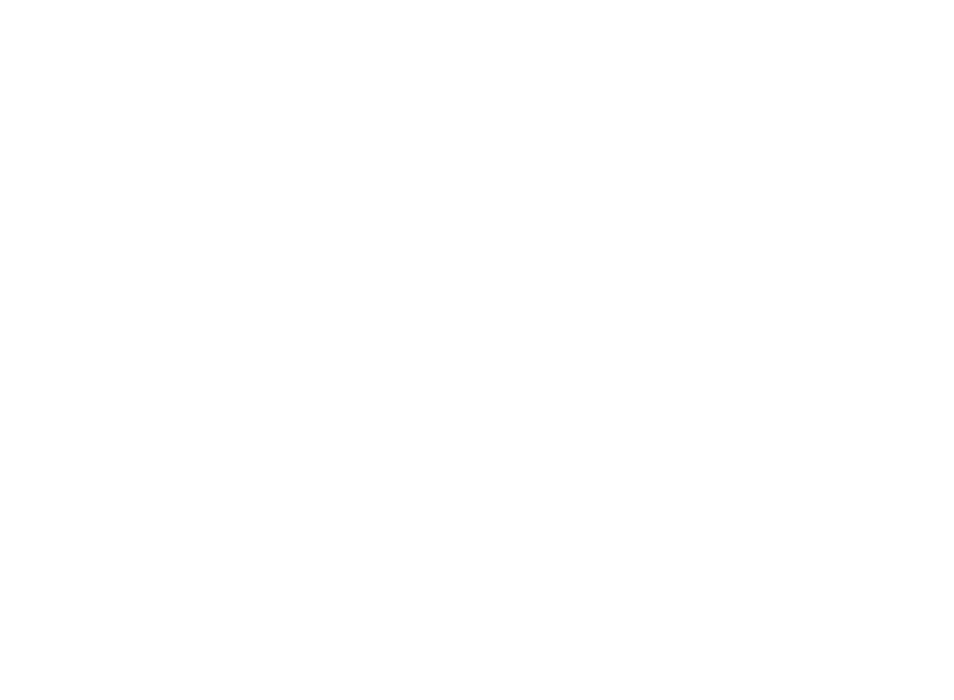

In [272]:
k=6
G = nx.Graph(dataset[k].edge_index.t().tolist())
cover_ploter(G)